
# White Patch

A estratégia desse algoritmo é estimar o iluminante através dos valores máximos presentes em cada canal de cor, como mostra a Equação:

\begin{equation} \label{eq:whitepatch}
o_{k} (x,y) = \frac{c_{k}(x,y)}{L_{i,{max}}},
\end{equation}

onde $o_{k}$ é a cor de saída do pixel no canal $k$ (com $k \in \space \{r,g,b\}$) nas coordenadas (x,y), $c_{k}$ é a cor do pixel na imagem de entrada e $L_{i,{max}}$ representa o valor máximo em cada canal.


# Link para imagens:

*   [exemplo_a.png](https://drive.google.com/file/d/1pJ8Dy7SYubhb-eC0KOasxWXmXAEaEWZB/view?usp=sharing)
*   [exemplo_b.png](https://drive.google.com/file/d/1CqJAWzEovbPSnLvLsLNRYeaav2IYVG9G/view?usp=sharing)


In [ ]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt
from math import *


In [ ]:
def transform(image, min, max):
  for x in range(image.shape[0]):
    for y in range(image.shape[1]):
      image[x,y] = 255*(image[x,y] - min) / (max - min + 1e-5)
      
  return image

In [ ]:
def white_patch(input_image, threshold):
  
  img_size = input_image.shape[0]*input_image.shape[1]
  nimg = input_image.transpose(2,0,1).astype(np.float32) #(channel,h,w)
  outputImage = np.copy(nimg)

  estIllu = []
  for b in range(3):
    sortedValues = np.sort(nimg[b],axis=None)
    minValues = sortedValues[int(img_size * threshold)]
    maxValues = sortedValues[int(img_size * (1 - threshold))]
    estIllu.append(maxValues)

    outputImage[b] = transform(nimg[b], minValues, maxValues)
    outputImage[b] = np.clip(outputImage[b], a_min = 0, a_max=255)

  outputImage = outputImage.transpose(1,2,0).astype(np.uint8)
  return estIllu,outputImage


Text(0.5, 1.0, 'Corrected Image')

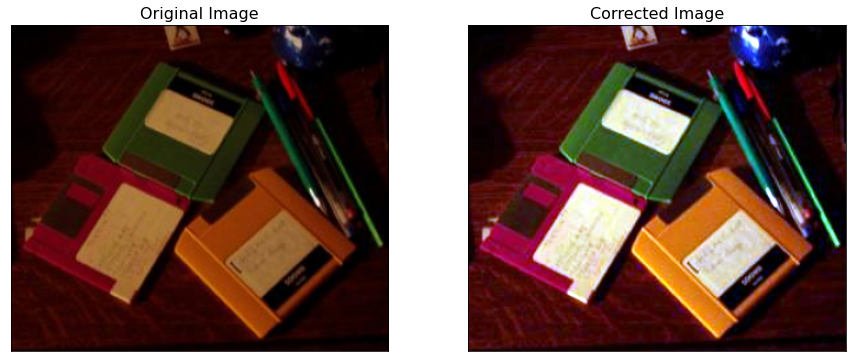

In [ ]:
# image = cv2.imread('exemplo_a.png')
image = cv2.imread('exemplo_b.png')

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
_,out_img = white_patch(image, 0.01)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))

fig.subplots_adjust(wspace=0.05)
ax[0].imshow(image)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(out_img)
ax[1].set_title('Corrected Image', size=16)


#  Gray World

Baseia-se na suposição de que a reflectância média em uma cena sob uma fonte de luz neutra é acromática. Dessa forma, qualquer mudança na cromaticidade média da imagem é causada pelos efeitos da fonte de luz. A cor da fonte de luz é estimada, então, através da média de cada canal de cor da imagem.A Equação abaixo apresenta a definição do método: 
\begin{equation} \label{eq:grayword}
o_{k} (x,y) = c_{k}(x,y)\bigg(\frac{f}{a_{k}}\bigg)
\end{equation}
onde $a_{k}$ é a média de cor em cada canal e $f$ a média sobre os valores  $a_{k}$ encontrados.

In [ ]:
def gray_world(input_image, threshold):
  img_size = input_image.shape[0]*input_image.shape[1]
  output_image = input_image.transpose(2,0,1).astype(np.float32) #(channel,h,w)

  r_mean = np.mean(output_image[0])
  g_mean = np.mean(output_image[1])
  b_mean = np.mean(output_image[2])

  estIllu = [r_mean, g_mean, b_mean]

  for ch in range(3):
    output_image[ch] /= estIllu[ch]
  
  sortedValues = np.sort(output_image, axis=None)
  maxValue = sortedValues[int(3*img_size*(1 - threshold))]
  output_image /= (maxValue + 1e-5)
  output_image = np.clip(output_image,a_min=0,a_max=1)

  return estIllu,(output_image * 255).transpose(1,2,0).astype(np.uint8)


Text(0.5, 1.0, 'Corrected Image')

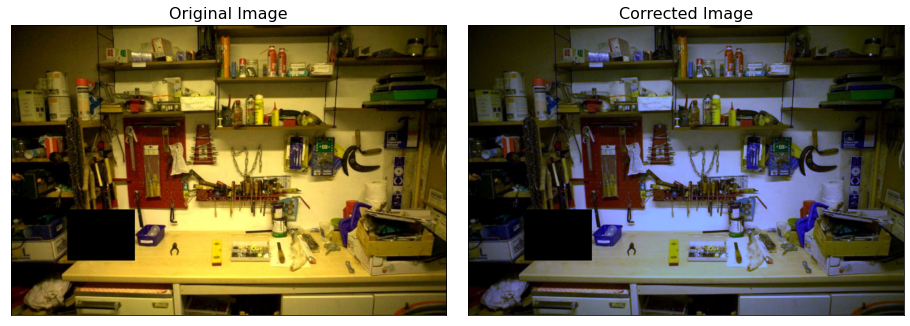

In [ ]:
image = cv2.imread('exemplo_a.png')
# image = cv2.imread('exemplo_b.png')

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
_,out_img = gray_world(image, 0.01)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))

fig.subplots_adjust(wspace=0.05)
ax[0].imshow(image)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(out_img)
ax[1].set_title('Corrected Image', size=16)


# Erro angular

In [ ]:
def angular_error(estimation, ground_truth):
  return acos(
      np.clip(
          np.dot(estimation, ground_truth) / np.linalg.norm(estimation) /
          np.linalg.norm(ground_truth), -1, 1))

Imagem original


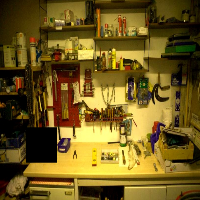

White Patch. Erro: 0.69


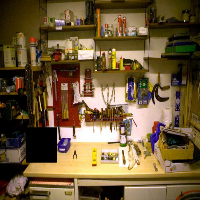

Gray World. Erro: 0.86


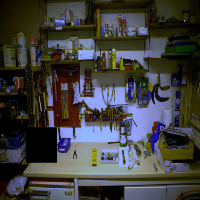

In [ ]:
from google.colab.patches import cv2_imshow 

img = cv2.imread('exemplo_a.png')
# no caso, temos apenas o ground truth para a imagem 'exemplo_a.png'
illu_gd= np.array((0.526205, 0.35181, 0.121985)) 


image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

illu_wp, out_img_wp = white_patch(image, 0.01) 
illu_gw, out_img_gw = gray_world(image, 0.01) 


# Calculando o erro angular
err_wp =  angular_error(illu_wp, illu_gd)
err_gw =  angular_error(illu_gw, illu_gd)

print("Imagem original")
cv2_imshow(cv2.resize(image, (200,200), interpolation=cv2.INTER_LINEAR))

print("White Patch. Erro: {:.2f}".format(err_wp))
cv2_imshow(cv2.resize(out_img_wp, (200,200), interpolation=cv2.INTER_LINEAR))

print("Gray World. Erro: {:.2f}".format(err_gw))
cv2_imshow(cv2.resize(out_img_gw, (200,200), interpolation=cv2.INTER_LINEAR))

